# Lectura y graficación de una señal almacenada en un archivo txt

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [148]:
f = open("signalMarcelo.txt","r")
raw_data = f.readline()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n'

In [149]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = 100

print(x)

100


In [150]:
Fs = float(x)
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=100.0 hz
 Ts=0.01 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [171]:
array = np.genfromtxt("./signalStephany.txt", delimiter="\t",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 590.,  nan],
       [  1.,   0.,   0., ...,   0., 385.,  nan],
       [  2.,   0.,   0., ...,   0., 625.,  nan],
       ...,
       [ 15.,   0.,   0., ...,   0., 519.,  nan],
       [  0.,   0.,   0., ...,   0., 387.,  nan],
       [  1.,   0.,   0., ...,   0., 623.,  nan]])

In [172]:
#Extraemos la columna de la señal
signal = array[:, 5]
signal

array([590., 385., 625., ..., 519., 387., 623.])

In [173]:
#Obtenemos la longitud de la señal
n = len(signal)
n

3090

In [174]:
#Creamos un vector tiempo conociendo n y Ts
t = np.arange(0,n*Ts,Ts)
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.087e+01, 3.088e+01,
       3.089e+01])

## Ploteamos la lectura

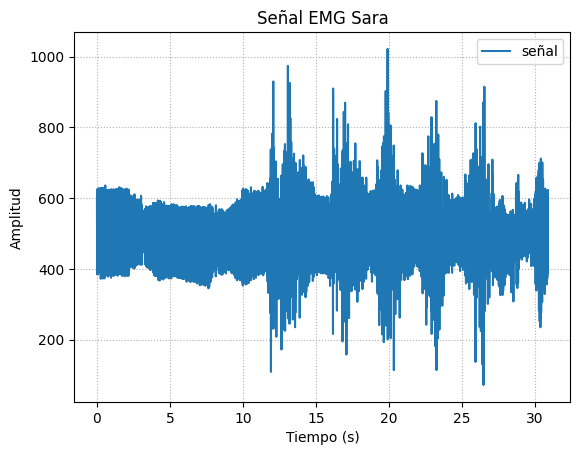

In [175]:
plt.plot(t, signal, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.title("Señal EMG Sara")
plt.show()

## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

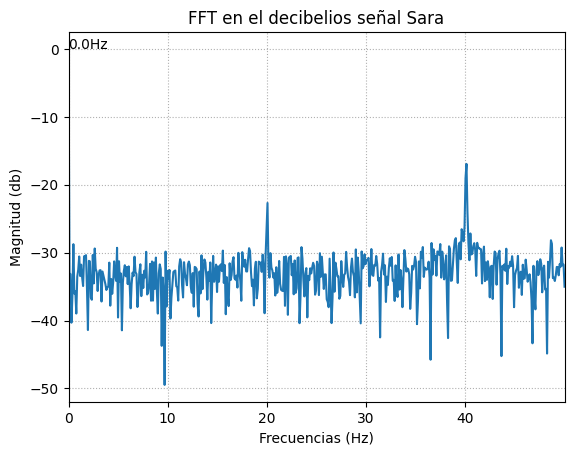

In [156]:
N = 2**10                                     # 10 bits, 0-1023

#signal1 = array[:,1]

signal_fft = np.fft.fft(signal, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios señal Sara")
plt.xlim([0,50])
plt.xticks(np.arange(0,50,10))
plt.show()

## Segmentación de la Señal


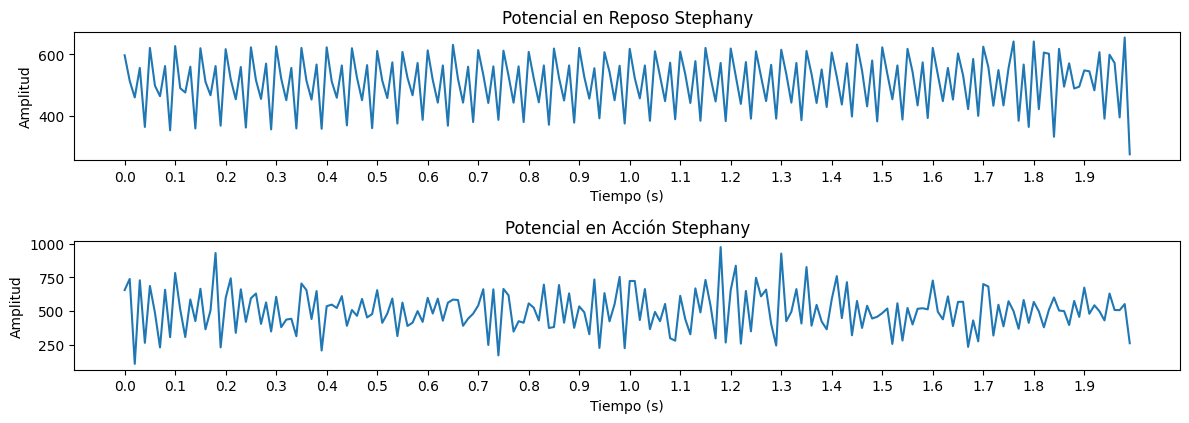

In [183]:
inicio = 9.9
reposo = 11.9
fuerza = 13.9

signal_reposo = signal[int(inicio*Fs):int(reposo*Fs)]
signal_fuerza = signal[int(reposo*Fs):int(fuerza*Fs)]

tiempo_reposo = [i / Fs for i in range(len(signal_reposo))]
tiempo_fuerza = [i / Fs for i in range(len(signal_fuerza))]

plt.figure(figsize=(12, 6))

plt.subplot(311)
plt.plot(tiempo_reposo, signal_reposo)
plt.title('Potencial en Reposo Stephany')
plt.xticks(np.arange(0,2,0.1))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(312)
plt.plot(tiempo_fuerza,signal_fuerza)
plt.title('Potencial en Acción Stephany')
plt.xticks(np.arange(0,2,0.10))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')



plt.tight_layout()
plt.show()
